**Tests for task (d)**

In [2]:
from imports import *
from classes import NeuralNetwork, GradientDescent
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\imports.py'>

First, we look at the MSE as a function of network depth and number of nodes for the sigmoid activation in all layers. 

Layers: 1 and nodes: 1 with time: 6.47 s, and MSE: 7.20e-02
Layers: 1 and nodes: 5 with time: 6.70 s, and MSE: 9.93e-03
Layers: 1 and nodes: 10 with time: 7.61 s, and MSE: 9.95e-03
Layers: 1 and nodes: 50 with time: 14.59 s, and MSE: 1.04e-02
Layers: 1 and nodes: 100 with time: 21.25 s, and MSE: 1.24e-02
Layers: 2 and nodes: 1 with time: 12.08 s, and MSE: 7.09e-02
Layers: 2 and nodes: 5 with time: 11.43 s, and MSE: 9.87e-03
Layers: 2 and nodes: 10 with time: 16.03 s, and MSE: 9.86e-03
Layers: 2 and nodes: 50 with time: 32.22 s, and MSE: 1.11e-02
Layers: 2 and nodes: 100 with time: 42.49 s, and MSE: 1.03e-02
Layers: 3 and nodes: 1 with time: 12.75 s, and MSE: 8.75e-02
Layers: 3 and nodes: 5 with time: 14.84 s, and MSE: 1.01e-02
Layers: 3 and nodes: 10 with time: 15.69 s, and MSE: 9.83e-03
Layers: 3 and nodes: 50 with time: 34.18 s, and MSE: 1.08e-02
Layers: 3 and nodes: 100 with time: 62.61 s, and MSE: 1.39e-02
Layers: 4 and nodes: 1 with time: 15.00 s, and MSE: 8.75e-02
Layers: 4 and n

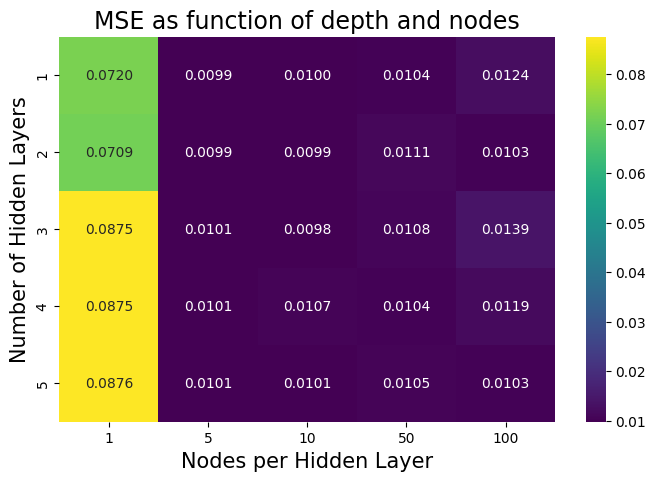

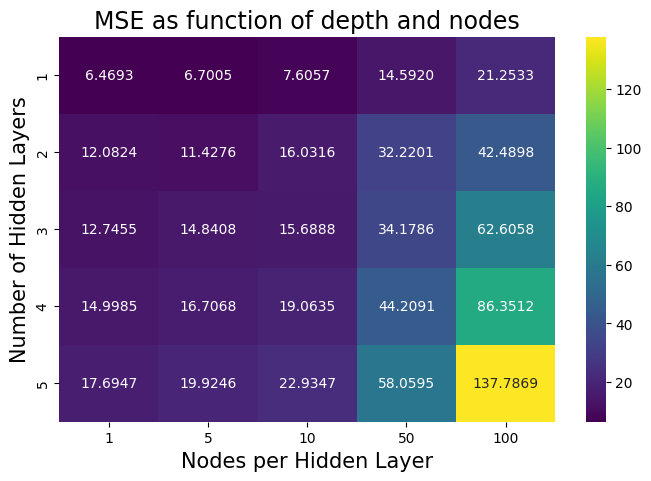

In [10]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(n=100, noise_std=0.1)

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [sigmoid]*(hidden_layer) + [identity], [sigmoid_der]*(hidden_layer)+[identity_der], mse, mse_der)
        LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_train)
        mseMatrix[h, n] = format(mse(y_pred, y_train), ".2e")

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s, and MSE: {format(mseMatrix[h,n], ".2e")}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_MSE.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')




Do the same tests but reLU as activation in hidden layers

Layers: 1 and nodes: 1 with time: 6.30 s, and MSE: 1.33e-01
Layers: 1 and nodes: 5 with time: 6.43 s, and MSE: 4.52e-02
Layers: 1 and nodes: 10 with time: 6.58 s, and MSE: 4.81e-02
Layers: 1 and nodes: 50 with time: 7.74 s, and MSE: 4.39e-02
Layers: 1 and nodes: 100 with time: 8.84 s, and MSE: 4.49e-02
Layers: 2 and nodes: 1 with time: 9.50 s, and MSE: 1.22e-01
Layers: 2 and nodes: 5 with time: 9.43 s, and MSE: 4.53e-02
Layers: 2 and nodes: 10 with time: 9.98 s, and MSE: 4.48e-02
Layers: 2 and nodes: 50 with time: 19.00 s, and MSE: 4.63e-02
Layers: 2 and nodes: 100 with time: 44.73 s, and MSE: 4.44e-02
Layers: 3 and nodes: 1 with time: 11.96 s, and MSE: 1.33e-01
Layers: 3 and nodes: 5 with time: 12.00 s, and MSE: 4.59e-02
Layers: 3 and nodes: 10 with time: 12.61 s, and MSE: 4.83e-02
Layers: 3 and nodes: 50 with time: 32.84 s, and MSE: 4.41e-02
Layers: 3 and nodes: 100 with time: 78.82 s, and MSE: 4.56e-02
Layers: 4 and nodes: 1 with time: 15.63 s, and MSE: 1.32e-01
Layers: 4 and nodes:

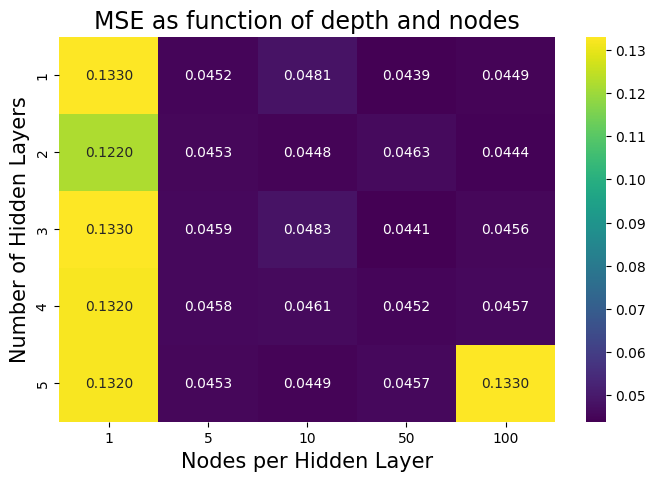

In [16]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(n=100, noise_std=0.2)

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [reLU]*(hidden_layer) + [identity], [ReLU_der]*(hidden_layer)+[identity_der], mse, mse_der)
        LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = format(mse(y_pred, y_test), ".2e")

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s, and MSE: {format(mseMatrix[h,n], ".2e")}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_MSETest_reLU.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Even with a relatively high noise, we do not get any noticable overfitting with the chosen parameter set

Why do we see so many equal numbers, deviating greately from the rest (purple ones)? Vanishing/exploding gradients?

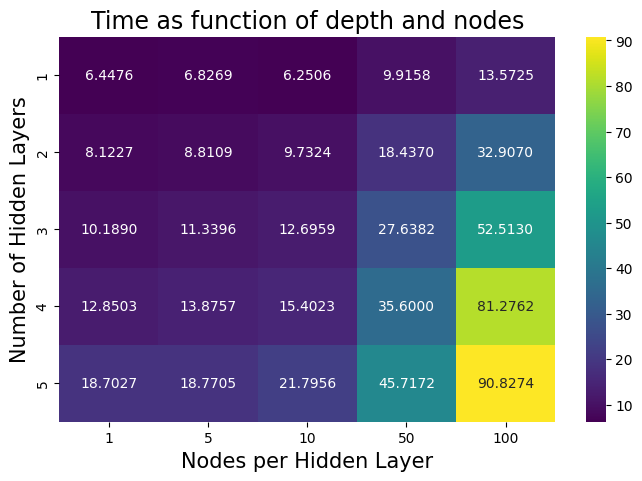

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Time as function of depth and nodes", fontsize=17)
save_path = os.path.join(save_dir, "HM_d_complexity.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

Layers: 1 and nodes: 1 with time: 6.69 s
Layers: 1 and nodes: 5 with time: 7.58 s
Layers: 1 and nodes: 10 with time: 8.29 s
Layers: 1 and nodes: 50 with time: 11.33 s
Layers: 2 and nodes: 1 with time: 8.10 s
Layers: 2 and nodes: 5 with time: 10.68 s
Layers: 2 and nodes: 10 with time: 9.99 s
Layers: 2 and nodes: 50 with time: 19.84 s
Layers: 3 and nodes: 1 with time: 10.50 s
Layers: 3 and nodes: 5 with time: 11.93 s
Layers: 3 and nodes: 10 with time: 20.62 s
Layers: 3 and nodes: 50 with time: 83.53 s
Layers: 4 and nodes: 1 with time: 13.99 s
Layers: 4 and nodes: 5 with time: 14.36 s
Layers: 4 and nodes: 10 with time: 15.31 s
Layers: 4 and nodes: 50 with time: 97.92 s


Text(0.5, 1.0, 'MSE as function of depth and nodes')

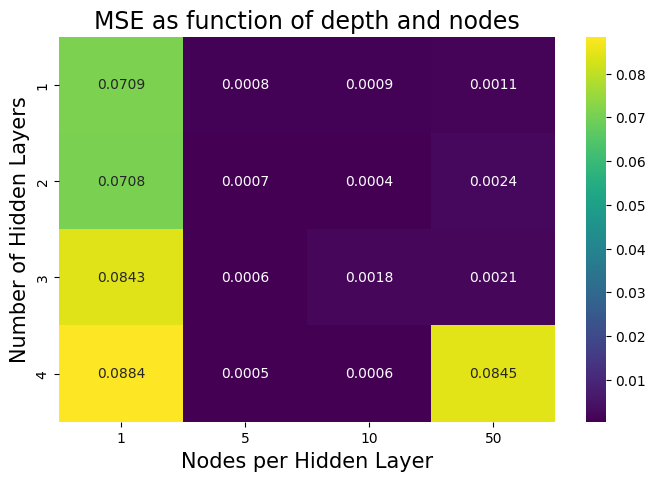

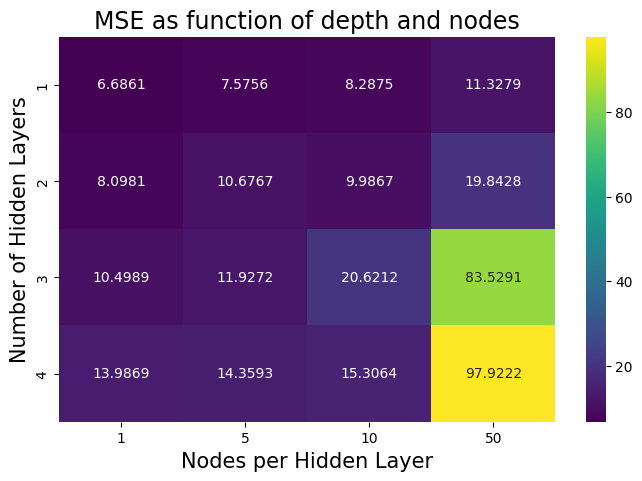

In [ ]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10]
hidden_layers = [1,2,3]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [sigmoid]*(hidden_layer+1), [sigmoid_der]*(hidden_layer+1), mse, mse_der)
        LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = mse(y_pred, y_test)

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s")


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)


fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)


Testing for other activation functions, but the same activation for hidden and output

In [ ]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU, identity]
activation_ders  = [sigmoid_der, reLU, leaky_reLU, identity_der]
nodes_list = [1,5,10,20]
hidden_layers = [1,2,3,4]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):
        for i in range(len(activation_funcs)):


            #a = random.randint(0,len(activation_funcs)-1) # Draws two unique activation functions.

            act = activation_funcs[i]
            act_der  = activation_ders[i]

            LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [act]*(hidden_layer+1), [act_der]*(hidden_layer+1), mse, mse_der)
            LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
            y_pred = LinReg.feed_forward(X_test)
            mseMatrix[h, n] = format(mse(y_pred, y_test), ".2e")

            print(f"Activation function: {act.__name__} with MSE: {mseMatrix[h,n]} w hl: {hidden_layer}, nodes: {nodes}")



Activation function: sigmoid with MSE: 0.0709 w hl: 1, nodes: 1
Activation function: reLU with MSE: 0.0843 w hl: 1, nodes: 1
Activation function: leaky_reLU with MSE: 32900000.0 w hl: 1, nodes: 1
Activation function: identity with MSE: 0.0923 w hl: 1, nodes: 1
Activation function: sigmoid with MSE: 0.000707 w hl: 1, nodes: 5
Activation function: reLU with MSE: 0.168 w hl: 1, nodes: 5
Activation function: leaky_reLU with MSE: 420000000.0 w hl: 1, nodes: 5
Activation function: identity with MSE: 0.0848 w hl: 1, nodes: 5
Activation function: sigmoid with MSE: 0.000776 w hl: 1, nodes: 10
Activation function: reLU with MSE: 0.168 w hl: 1, nodes: 10
Activation function: leaky_reLU with MSE: 2790000000.0 w hl: 1, nodes: 10
Activation function: identity with MSE: 0.0872 w hl: 1, nodes: 10
Activation function: sigmoid with MSE: 0.000751 w hl: 1, nodes: 20
Activation function: reLU with MSE: 0.168 w hl: 1, nodes: 20
Activation function: leaky_reLU with MSE: 9070000000.0 w hl: 1, nodes: 20
Activa

MSE Values for the leaky reLU gets ridicuously high. Assume that it's a problem having these as activation functions when trying to force the output between 0 and 1. Sigmoid and identity works well for this

Testing for the same activation function across all hidden layers, but with identity output activation. Trying to see if ReLU performs good in the hidden layers with sigmoid activation.

In [19]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [reLU, leaky_reLU, identity, sigmoid]
activation_ders  = [reLU, leaky_reLU, identity_der, sigmoid_der]
nodes_list = [1,5,10,20]
hidden_layers = [1,2,3,4]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):
        for i in range(len(activation_funcs)):


            activationHidden = activation_funcs[i]
            activationHidden_der  = activation_ders[i]

            LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [activationHidden]*(hidden_layer) + [identity], [activationHidden_der]*(hidden_layer) + [identity_der], mse, mse_der)
            LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.1, functional=NN_ADAM)
            y_pred = LinReg.feed_forward(X_test)
            mseMatrix[h, n] = format(mse(y_pred, y_test), ".2e")


            print(f"Hidden act: {activationHidden.__name__}, output act: identity, with MSE: {mseMatrix[h,n]} w hl: {hidden_layer}, nodes: {nodes}")




Hidden act: reLU, output act: identity, with MSE: 0.0844 w hl: 1, nodes: 1
Hidden act: leaky_reLU, output act: identity, with MSE: 0.0843 w hl: 1, nodes: 1
Hidden act: identity, output act: identity, with MSE: 0.0875 w hl: 1, nodes: 1
Hidden act: sigmoid, output act: identity, with MSE: 0.0646 w hl: 1, nodes: 1
Hidden act: reLU, output act: identity, with MSE: 0.0887 w hl: 1, nodes: 5
Hidden act: leaky_reLU, output act: identity, with MSE: 0.0894 w hl: 1, nodes: 5
Hidden act: identity, output act: identity, with MSE: 0.0856 w hl: 1, nodes: 5
Hidden act: sigmoid, output act: identity, with MSE: 0.0004 w hl: 1, nodes: 5
Hidden act: reLU, output act: identity, with MSE: 0.0846 w hl: 1, nodes: 10
Hidden act: leaky_reLU, output act: identity, with MSE: 0.0873 w hl: 1, nodes: 10
Hidden act: identity, output act: identity, with MSE: 0.0847 w hl: 1, nodes: 10
Hidden act: sigmoid, output act: identity, with MSE: 0.000751 w hl: 1, nodes: 10
Hidden act: reLU, output act: identity, with MSE: 0.084

Enough tweaking for activation functions? Morten said there is no need to have different activations for different hidden layers, and for linear regression, we only have identity as output activation

Same as for first test, but with reLU in all layers

In [ ]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data()

activation_funcs = [sigmoid, reLU, leaky_reLU]
activation_ders  = [sigmoid_der, reLU, leaky_reLU]
nodes_list = [1,5,10,50,100]
hidden_layers = [1,2,3,4,5]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
timeMatrix = np.empty(mseMatrix.shape)

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):

        start = time.perf_counter()

        LinReg = NeuralNetwork(1, [nodes]*hidden_layer + [1], [reLU]*(hidden_layer+1), [reLU]*(hidden_layer+1), mse, mse_der)
        LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
        y_pred = LinReg.feed_forward(X_test)
        mseMatrix[h, n] = mse(y_pred, y_test)

        end = time.perf_counter()
        time_iter = end - start
        timeMatrix[h,n] = time_iter

        print(f"Layers: {hidden_layer} and nodes: {nodes} with time: {time_iter:.2f} s")

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(mseMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(timeMatrix, annot=True, fmt=".4f", cmap="viridis", ax=ax, xticklabels=nodes_list, yticklabels=hidden_layers)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("MSE as function of depth and nodes", fontsize=17)

Looking for overfitting